In [4]:
'''
reading csv file and separete them with ham and spam

'''
import numpy as np 
import pandas as pd
import os
df=pd.read_csv('~/downloads/email_classification.csv')
df.head()
df.info()
df.isnull().sum()
df['label'].value_counts() # that gives the number of 0 and 1
spam=df[df['label']==1] #it take the all spam 
spam.head()
ham=df[df['label']==0]
ham.head()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3016 entries, 0 to 3015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   email   3015 non-null   object 
 1   label   3000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.2+ KB


,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0.0
1,martin a posted tassos papadopoulos the greek ...,0.0
2,man threatens explosion in moscow thursday aug...,0.0
3,klez the virus that won t die already the most...,0.0
4,in adding cream to spaghetti carbonara which ...,0.0


In [5]:
ham=ham.sample(spam.shape[0])
ham.shape

(500, 2)

In [6]:
data=ham.append(spam,ignore_index=True)
data.tail()

,email,label
995,abc s good morning america ranks it the NUMBE...,1.0
996,hyperlink hyperlink hyperlink let mortgage le...,1.0
997,thank you for shopping with us gifts for all ...,1.0
998,the famous ebay marketing e course learn to s...,1.0
999,hello this is chinese traditional 子 件 NUMBER世...,1.0


In [7]:
#separete data and label

X=data['email'].fillna('')
y=data['label']


In [26]:
''' this is new email with spam we just want to check it'''

new=['get everything in free with just one click']

In [27]:
''' regular expression on email data'''

import re
def preprocess(text):
    text=text.str.lower()
    text=text.str.replace(r'\r',' ')
    text=text.str.replace(r'\n',' ')
    text=text.str.replace('[^a-zA-Z0-9]',' ')
    return text
    
    
    

In [28]:
X=preprocess(X)
print(X.shape)

(1000,)


In [32]:
''' split the data vectorization and model selection'''


from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer 
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=0,shuffle=True)
xtrain.head()
v1=TfidfVectorizer()
mat0=v1.fit_transform(new)
vec=TfidfVectorizer()
mat=vec.fit_transform(xtrain)

print(vec.vocabulary_) # it give the number of uniq word in documents

  (0, 0)	0.35355339059327373
  (0, 6)	0.35355339059327373
  (0, 5)	0.35355339059327373
  (0, 7)	0.35355339059327373
  (0, 2)	0.35355339059327373
  (0, 4)	0.35355339059327373
  (0, 1)	0.35355339059327373
  (0, 3)	0.35355339059327373


In [16]:
#fitting to the data
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100,n_jobs=-1))])
clf.fit(xtrain,ytrain)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [33]:
y_predict=clf.predict(xtest)
clf.predict(new)  # new is declare as spam by model that is true  

array([1.])

In [21]:
#evalution to the model with confusion matrix 

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
confus=confusion_matrix(y_predict,ytest)
print(confus)


[[142   8]
 [  2 148]]


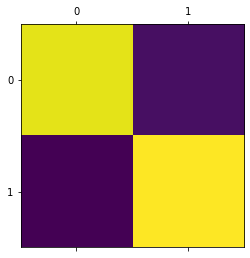

In [22]:
import matplotlib.pyplot as plt
plt.matshow(confus)
plt.show()

In [23]:
classification_report(y_predict,ytest)

'              precision    recall  f1-score   support\n\n         0.0       0.99      0.95      0.97       150\n         1.0       0.95      0.99      0.97       150\n\n    accuracy                           0.97       300\n   macro avg       0.97      0.97      0.97       300\nweighted avg       0.97      0.97      0.97       300\n'

In [24]:
accuracy_score(y_predict,ytest)

0.9666666666666667